<a href="https://colab.research.google.com/github/Ishita95-harvad/Tweet-Sentiment-Classification-/blob/main/Tweet_Sentiment_Classification_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tweet Sentiment Classification

Fake but realistic tweets with sentiment labels: positive, neutral, or negative.

In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("sahideseker/tweet-sentiment-classification-dataset")

print("Path to dataset files:", path)

Path to dataset files: /kaggle/input/tweet-sentiment-classification-dataset


# Task
execute and run output

Here is all the data you need:
"tweet_sentiment.csv"

## Data loading

### Subtask:
Load the dataset "tweet_sentiment.csv" into a pandas DataFrame.


**Reasoning**:
Load the dataset "tweet_sentiment.csv" into a pandas DataFrame and display the first few rows.



In [1]:
import pandas as pd

try:
    df = pd.read_csv('tweet_sentiment.csv')
    display(df.head())
except FileNotFoundError:
    print("Error: 'tweet_sentiment.csv' not found.")
    df = None
except pd.errors.EmptyDataError:
    print("Error: 'tweet_sentiment.csv' is empty.")
    df = None
except pd.errors.ParserError:
    print("Error: Unable to parse 'tweet_sentiment.csv'. Check file format.")
    df = None
except Exception as e:
    print(f"An unexpected error occurred: {e}")
    df = None

,tweet,sentiment
0,The event starts at 5 PM.,neutral
1,I hate how this turned out.,negative
2,Fantastic experience!,positive
3,Fantastic experience!,positive
4,This is the worst thing ever!,negative


## Data exploration

### Subtask:
Explore the loaded dataset to understand its characteristics.


**Reasoning**:
I need to explore the dataset by checking its shape, data types, descriptive statistics, missing values, and duplicates.  I will perform these checks in one code block.



In [2]:
# Check the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Examine data types
print("\nData Types:\n", df.dtypes)

# Generate descriptive statistics
print("\nDescriptive Statistics:\n", df.describe(include='all'))

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

# Check for duplicate rows
print("\nNumber of duplicate rows:", df.duplicated().sum())

# Summarize findings in markdown format
summary = """
## Data Exploration Summary

**Shape:** The DataFrame has {} rows and {} columns.

**Data Types:**
{}

**Descriptive Statistics:**
{}

**Missing Values:**
{}

**Duplicate Rows:** There are {} duplicate rows.
""".format(df.shape[0], df.shape[1], df.dtypes, df.describe(include='all'), df.isnull().sum(), df.duplicated().sum())

print("\nSummary:\n", summary)

Shape of the DataFrame: (1000, 2)

Data Types:
 tweet        object
sentiment    object
dtype: object

Descriptive Statistics:
                         tweet sentiment
count                    1000      1000
unique                     17         3
top     Fantastic experience!  positive
freq                       71       396

Missing Values:
 tweet        0
sentiment    0
dtype: int64

Number of duplicate rows: 983

Summary:
 
## Data Exploration Summary

**Shape:** The DataFrame has 1000 rows and 2 columns.

**Data Types:**
tweet        object
sentiment    object
dtype: object

**Descriptive Statistics:**
                        tweet sentiment
count                    1000      1000
unique                     17         3
top     Fantastic experience!  positive
freq                       71       396

**Missing Values:**
tweet        0
sentiment    0
dtype: int64

**Duplicate Rows:** There are 983 duplicate rows.



## Data cleaning

### Subtask:
Clean the DataFrame `df` by removing duplicate rows.


**Reasoning**:
Remove duplicate rows from the DataFrame `df`, keeping the first occurrence, and print the shape of the resulting DataFrame.



In [3]:
# Remove duplicate rows, keeping the first occurrence
df = df.drop_duplicates(keep='first')

# Print the shape of the DataFrame after removing duplicates
print("Shape of the DataFrame after removing duplicates:", df.shape)

Shape of the DataFrame after removing duplicates: (17, 2)


## Data analysis

### Subtask:
Analyze the distribution of sentiments in the cleaned dataset.


**Reasoning**:
Group the DataFrame by sentiment, calculate the size and relative frequency of each group, and store the results in a new DataFrame for easier visualization.



In [4]:
# Group the DataFrame by the 'sentiment' column
sentiment_counts = df.groupby('sentiment').size()

# Calculate the relative frequency of each sentiment
sentiment_percentages = (sentiment_counts / sentiment_counts.sum()) * 100

# Create a new DataFrame to store the sentiment counts and percentages
sentiment_analysis = pd.DataFrame({'count': sentiment_counts, 'percentage': sentiment_percentages})

# Display the sentiment analysis DataFrame
display(sentiment_analysis)

,count,percentage
sentiment,,
negative,6,35.294118
neutral,5,29.411765
positive,6,35.294118


## Data visualization

### Subtask:
Visualize the sentiment distribution using a bar chart.


**Reasoning**:
Create a bar chart to visualize the sentiment distribution using the data in the `sentiment_analysis` DataFrame.



<Figure size 800x600 with 0 Axes>

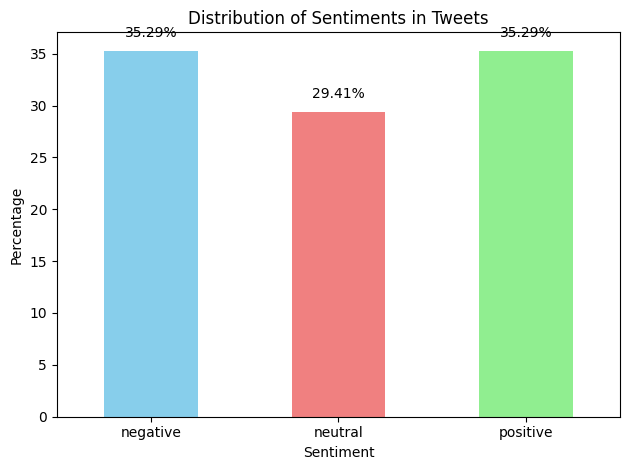

In [5]:
import matplotlib.pyplot as plt

# Create the bar chart
plt.figure(figsize=(8, 6))  # Adjust figure size for better readability
sentiment_analysis.plot(kind='bar', y='percentage', color=['skyblue', 'lightcoral', 'lightgreen'])
plt.xlabel('Sentiment')
plt.ylabel('Percentage')
plt.title('Distribution of Sentiments in Tweets')
plt.xticks(rotation=0)  # Keep x-axis labels horizontal
plt.legend().remove()  # Remove legend as only one value is plotted

# Add annotations to display exact percentages on the bars
for i, v in enumerate(sentiment_analysis['percentage']):
    plt.text(i, v + 1, f'{v:.2f}%', ha='center', va='bottom')

plt.tight_layout()  # Adjust layout to prevent overlapping labels
plt.show()

**Reasoning**:
The previous plot command didn't produce the expected output.  I will try again, this time explicitly creating the plot using `matplotlib.pyplot.bar` to gain more control and fix the issue.



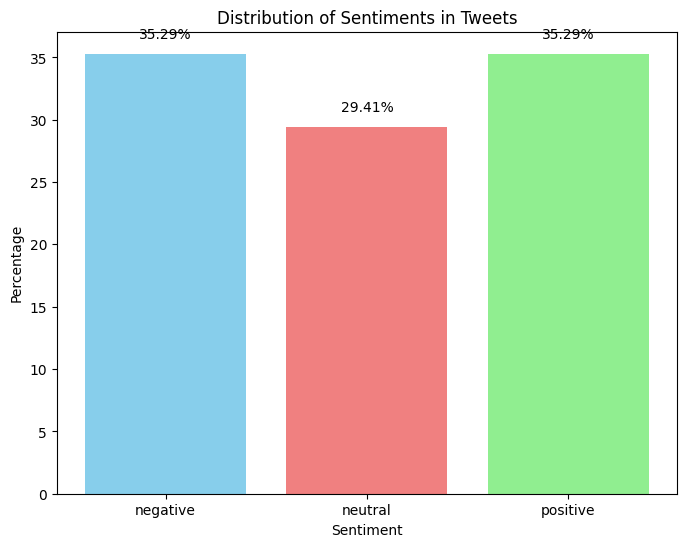

In [6]:
import matplotlib.pyplot as plt

# Create the bar chart using matplotlib.pyplot.bar
plt.figure(figsize=(8, 6))
sentiments = sentiment_analysis.index.tolist()
percentages = sentiment_analysis['percentage'].tolist()
colors = ['skyblue', 'lightcoral', 'lightgreen']
bars = plt.bar(sentiments, percentages, color=colors)

# Add labels and title
plt.xlabel("Sentiment")
plt.ylabel("Percentage")
plt.title("Distribution of Sentiments in Tweets")

# Add percentage annotations to the bars
for bar, percentage in zip(bars, percentages):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{percentage:.2f}%', ha='center', va='bottom')

# Display the chart
plt.show()

                           Thank You !